<a href="https://colab.research.google.com/github/YelizavetaP/NN2022labs/blob/main/lab5/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота 5

з дисципліни "Нейронні мережі" <br>
студентки 3 курсу КН ФІТ<br>
Поповаї Єлизавети

1. На основі документу вирішити завдання класифікації зображень їжі для 3 класів з набору даних food101 <br>
2. Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком групи.<br>
3. Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb


Завантажимо данні

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip 
zip_ref = zipfile.ZipFile("101_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-05-22 11:34:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.33.208, 172.217.15.112, 142.251.45.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.33.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   231MB/s    in 6.2s    

2022-05-22 11:34:26 (250 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



Виділяємо класи за варіантом: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних

In [3]:
import pathlib
import numpy as np
data_dir = pathlib.Path("101_food_classes_10_percent/train/") # turn our training path into a Python path
all_class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
n = 19
my_class_names = [all_class_names[n-1], all_class_names[n+29], all_class_names[n+59]]
print(my_class_names)

['chicken_curry', 'greek_salad', 'poutine']


Видаляємо з набору все що не є класами за варіантом

In [4]:
from pathlib import Path
import shutil

for path in all_class_names:
  if path != my_class_names[0] and path != my_class_names[1] and path != my_class_names[2]:
    dirpath = Path('101_food_classes_10_percent/train') / path
    if dirpath.exists() and dirpath.is_dir():
        shutil.rmtree(dirpath)
    dirpath = Path('101_food_classes_10_percent/test') / path
    if dirpath.exists() and dirpath.is_dir():
        shutil.rmtree(dirpath)

In [5]:
import os
for dirpath, dirnames, filenames in os.walk("101_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 3 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/greek_salad'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/poutine'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/chicken_curry'.
There are 3 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/greek_salad'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/poutine'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/chicken_curry'.


In [6]:
# Define training and test directory paths
train_dir = "101_food_classes_10_percent/test/"
test_dir = "101_food_classes_10_percent/train/"

In [7]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


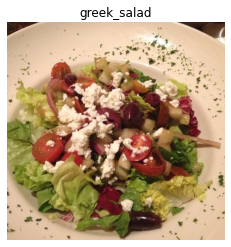

In [71]:
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(my_class_names))

Перетворимо зображення на дані

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


In [ ]:
train_data[1]

Змінимо наші дані, щоб модель мала більш різноманітні зображення, наприклад збільшені, або перевернуті

In [12]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 750 images belonging to 3 classes.


Створимо та навчимо модель

In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax')
])

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(train_data_augmented,
                          epochs=30,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/30
24/24 [==============================] - 12s 467ms/step - loss: 1.3722 - accuracy: 0.4227 - val_loss: 1.0123 - val_accuracy: 0.4978
Epoch 2/30
24/24 [==============================] - 11s 480ms/step - loss: 0.9762 - accuracy: 0.5067 - val_loss: 0.9324 - val_accuracy: 0.5289
Epoch 3/30
24/24 [==============================] - 11s 456ms/step - loss: 0.8974 - accuracy: 0.5587 - val_loss: 0.8974 - val_accuracy: 0.5733
Epoch 4/30
24/24 [==============================] - 14s 574ms/step - loss: 0.8351 - accuracy: 0.5907 - val_loss: 0.8651 - val_accuracy: 0.5778
Epoch 5/30
24/24 [==============================] - 11s 455ms/step - loss: 0.8198 - accuracy: 0.6120 - val_loss: 0.8926 - val_accuracy: 0.5867
Epoch 6/30
24/24 [==============================] - 11s 459ms/step - loss: 0.7718 - accuracy: 0.6267 - val_loss: 0.8809 - val_accuracy: 0.6000
Epoch 7/30
24/24 [==============================] - 11s 456ms/step - loss: 0.7496 - accuracy: 0.6507 - val_loss: 0.8100 - val_accuracy: 0.6489

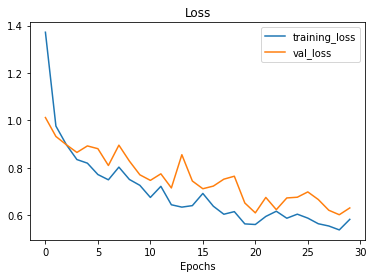

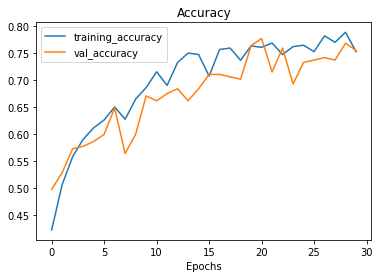

In [75]:
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(len(history.history['loss']))

plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend();

In [36]:
def load_and_prep_image(filename, img_shape=224):

  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img


In [22]:
def pred_and_plot(model, filename, class_names):

  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [33]:
!ls 101_food_classes_10_percent/train/greek_salad

1007149.jpg  1498400.jpg  198261.jpg   2651518.jpg  3327353.jpg  625650.jpg
1009138.jpg  1581258.jpg  2014925.jpg  2882640.jpg  3354804.jpg  628714.jpg
1054252.jpg  1668619.jpg  2050038.jpg  2920685.jpg  3460172.jpg  671268.jpg
1123335.jpg  1703980.jpg  2125739.jpg  2949322.jpg  3470168.jpg  710180.jpg
1132542.jpg  1703991.jpg  2141820.jpg  3009327.jpg  3525121.jpg  741556.jpg
1202870.jpg  1733556.jpg  214557.jpg   3029038.jpg  3664094.jpg  751141.jpg
1235436.jpg  1768258.jpg  2216466.jpg  3120139.jpg  3716588.jpg  767840.jpg
1316126.jpg  1801133.jpg  2317337.jpg  3134866.jpg  3805611.jpg  848458.jpg
1342152.jpg  1829935.jpg  2331666.jpg  3147089.jpg  3811010.jpg  94603.jpg
1411627.jpg  1835083.jpg  2349402.jpg  31566.jpg    3863729.jpg  979057.jpg
1467106.jpg  1861383.jpg  2381019.jpg  3168219.jpg  39098.jpg
146896.jpg   1912440.jpg  242231.jpg   3173938.jpg  456656.jpg
1478320.jpg  1915558.jpg  2558518.jpg  3259345.jpg  477936.jpg


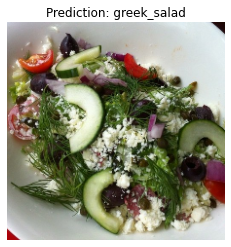

In [76]:
pred_and_plot(model, "101_food_classes_10_percent/train/greek_salad/2216466.jpg", my_class_names)

In [38]:
!ls 101_food_classes_10_percent/train/chicken_curry

105113.jpg   1696809.jpg  2055366.jpg  274101.jpg   329921.jpg	 609133.jpg
1085387.jpg  1731668.jpg  2087169.jpg  2753085.jpg  35409.jpg	 627128.jpg
1116408.jpg  1757433.jpg  215830.jpg   2786996.jpg  3542597.jpg  664427.jpg
1147844.jpg  1784510.jpg  2196716.jpg  2811494.jpg  3585988.jpg  744896.jpg
1165360.jpg  1788770.jpg  2264390.jpg  2850167.jpg  3661156.jpg  799892.jpg
1173563.jpg  1855072.jpg  2291280.jpg  2875950.jpg  374064.jpg	 807341.jpg
1299746.jpg  1900953.jpg  2343873.jpg  2914285.jpg  3757107.jpg  811637.jpg
1303435.jpg  1906787.jpg  2431933.jpg  3047106.jpg  3880355.jpg  876.jpg
1417268.jpg  191582.jpg   2474978.jpg  3100922.jpg  3904395.jpg  931003.jpg
1459303.jpg  1969063.jpg  2571997.jpg  3116085.jpg  3909329.jpg  95561.jpg
1467698.jpg  2011230.jpg  2647310.jpg  3132208.jpg  476425.jpg
1646416.jpg  2049685.jpg  2728934.jpg  3166575.jpg  554849.jpg
1670453.jpg  2051444.jpg  2729445.jpg  3181412.jpg  587633.jpg


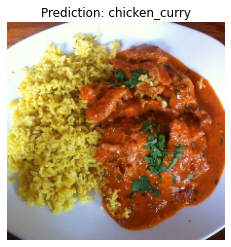

In [83]:
pred_and_plot(model, "101_food_classes_10_percent/train/chicken_curry/1459303.jpg", my_class_names)

In [39]:
!ls 101_food_classes_10_percent/train/poutine

1069917.jpg  1800271.jpg  2347983.jpg  308003.jpg   380497.jpg	 627792.jpg
1205782.jpg  1818584.jpg  2389967.jpg  3186011.jpg  3815557.jpg  663064.jpg
1207220.jpg  18293.jpg	  2395714.jpg  3191627.jpg  384014.jpg	 694267.jpg
1233138.jpg  1857826.jpg  2449407.jpg  3249402.jpg  3860702.jpg  742163.jpg
1280017.jpg  1952292.jpg  2462880.jpg  3343214.jpg  3899195.jpg  757599.jpg
1416605.jpg  1965053.jpg  2484905.jpg  3516515.jpg  465094.jpg	 820493.jpg
150821.jpg   1974970.jpg  261435.jpg   3582338.jpg  476320.jpg	 850813.jpg
1631484.jpg  2009435.jpg  263719.jpg   3630145.jpg  494195.jpg	 892377.jpg
1653464.jpg  2058056.jpg  266884.jpg   364642.jpg   566937.jpg	 964323.jpg
1741997.jpg  21784.jpg	  2698092.jpg  3689160.jpg  567478.jpg	 992940.jpg
1750480.jpg  227190.jpg   2766499.jpg  3775490.jpg  577430.jpg
1751251.jpg  2310986.jpg  289017.jpg   3780621.jpg  586409.jpg
1778977.jpg  2344290.jpg  2947827.jpg  3780959.jpg  613114.jpg


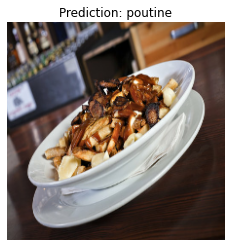

In [79]:
pred_and_plot(model, "101_food_classes_10_percent/train/poutine/1069917.jpg", my_class_names)

#Висновок
В даній лобораторній роботі було розглянуто вирішення задачі багатокласової класифікаціїї за допомогою нейронної мережі.